# Определение перспективного тарифа для телеком-компании

## Шаг 1. Обзор данных

Составление первого представления о данных статистики архива 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

In [13]:
# функция для просмотра информации и первых строк таблиц
def inform(df):
    df.info()
    print('*'*50)
    display(df.head())
    return

Чтение файлов users.csv, calls.csv, messages.csv, internet.csv, tariffs.csv и сохрание их в переменных:

In [3]:
# чтение файлов с данными и сохранение в переменных
users_df, calls_df, messages_df, internet_df, tariffs_df = (pd.read_csv('/datasets/users.csv'),
                                                           pd.read_csv('/datasets/calls.csv'),
                                                           pd.read_csv('/datasets/messages.csv'),
                                                           pd.read_csv('/datasets/internet.csv'),
                                                           pd.read_csv('/datasets/tariffs.csv'))

In [14]:
# общая информация и первые 5 строк таблицы users_df
inform(users_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
**************************************************


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
# общая информация и первые 5 строк таблицы calls_df
inform(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
**************************************************


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
# общая информация и первые 5 строк таблицы messages_df
inform(messages_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
**************************************************


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
# общая информация и первые 5 строк таблицы internet_df
inform(internet_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
**************************************************


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [18]:
# общая информация и первые 5 строк таблицы tariffs_df
inform(tariffs_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
**************************************************


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Согласно документации к данным:**

***Таблица users_df (информация о пользователях):***
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.

***Таблица calls_df (информация о звонках):***
* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

***Таблица messages_df (информация о сообщениях):***
* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

***Таблица internet_df (информация об интернет-сессиях):***
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

***Таблица tariffs_df (информация о тарифах):***
* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

При просмотре данных в таблицах, можно сделать вывод о том, что в названиях столбцов нарушений нет, тип данных соответсвует их содержимому в столбцах.
Для удобства исследования таблицы будут объедины и уже исходя из объединенной таблицы можно будет рассматривать наличие пропусков, дубликатов и ошибок в данных.

## Шаг 2. Предобработка данных

Смена типа данных в столбцах таблиц с датой:

In [19]:
# смена типа данных на DateTime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y.%m.%d %H:%M:%S')
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y.%m.%d %H:%M:%S')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y.%m.%d %H:%M:%S')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y.%m.%d %H:%M:%S')

Выделение месяца для таблиц:

In [20]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

In [23]:
# округление длительности звонков
calls_df['duration'] = np.ceil(calls_df['duration'])

In [24]:
# группировка для calls по user_id и month
calls = calls_df.groupby(['user_id', 'month']).agg({'duration': ['sum','count']}).reset_index()
calls.columns = ['user_id', 'month', 'duration_sum', 'duration_count'] # названия колонок

# группировка для internet по user_id и month
internet = internet_df.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

# группировка для messages по user_id и month и переименование колонки id
messages = messages_df.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'messages'}).reset_index()

In [28]:
# объединение таблиц
report = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')
report1 = report.merge(messages, on = ['user_id', 'month'], how = 'outer').fillna(0)
report2 = report1.merge(users_df, on = 'user_id', how = 'left')
df = report2.merge(tariffs_df, left_on = 'tariff', right_on = 'tariff_name', how = 'left')

In [27]:
# общая информация и первые 5 строк таблицы df
inform(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration_sum           3214 non-null   float64       
 3   duration_count         3214 non-null   float64       
 4   mb_used                3214 non-null   float64       
 5   messages               3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    object        
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

,user_id,month,duration_sum,duration_count,mb_used,messages,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [29]:
# перевод длительности звонков в int
df['duration_sum'] = df['duration_sum'].astype(int)

# перевод количества звонков в int
df['duration_count'] = df['duration_count'].astype(int)

# перевод затраченного интернета в Гб
df['mb_used'] = df['mb_used']/1024

# округление затраченного интернета в большую сторону и преведение к целому значению
df['mb_used'] = df['mb_used'].apply(np.ceil).astype(int)

# перевод предоставленного интернета в Гб и перевод значения в целочисленное
df['mb_per_month_included'] = (df['mb_per_month_included']/1024).astype(int)

# переименование столбцов с интернетом
df = df.rename(columns = {
        'mb_used': 'gb_used', 
        'mb_per_month_included': 'gb_per_month_included'})

# смена типа данных в столбце messages на целочисленный
df['messages'] = df['messages'].astype(int)

# проверка
display(df.head())

,user_id,month,duration_sum,duration_count,gb_used,messages,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,22,3,22,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
1,1000,6,172,43,23,60,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
2,1000,7,340,47,14,75,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
3,1000,8,408,52,14,81,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
4,1000,9,466,58,15,57,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra


Посчет для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [30]:
# выделение необходимых столбцов в одну таблицу
report = df[['user_id', 'last_name', 'month', 'duration_sum', 'duration_count', 'messages', 'gb_used']]
display(report)

,user_id,last_name,month,duration_sum,duration_count,messages,gb_used
0,1000,Верещагин,5,159,22,22,3
1,1000,Верещагин,6,172,43,60,23
2,1000,Верещагин,7,340,47,75,14
3,1000,Верещагин,8,408,52,81,14
4,1000,Верещагин,9,466,58,57,15
...,...,...,...,...,...,...,...
3209,1489,Гончаров,8,0,0,17,11
3210,1489,Гончаров,9,0,0,32,17
3211,1489,Гончаров,10,0,0,21,20
3212,1489,Гончаров,11,0,0,20,18


Подсчет помесячной выручки с каждого пользователя:

In [32]:
# создание функции для подсчета помесячной выручки с каждого пользователя
def revenue(row):
    
    minute_left = 0
    gd_left = 0
    message_left = 0
    
    if row['duration_sum'] > row['minutes_included']:
        minute_left = (row['duration_sum'] - row['minutes_included']) * row['rub_per_minute']
    
    if row['messages'] > row['messages_included']:
        message_left = (row['messages'] - row['messages_included']) * row['rub_per_message']
       
    if row['gb_used'] > row['gb_per_month_included']:
        gd_left = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    
    
    result = row['rub_monthly_fee'] + minute_left + gd_left + message_left
        
    return result

In [33]:
# создание столбца с помесячной выручкой для каждого пользователя
df['revenue_per_month'] = df.apply(revenue, axis = 1)
display(df)

,user_id,month,duration_sum,duration_count,gb_used,messages,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue_per_month
0,1000,5,159,22,3,22,52,NaN,Краснодар,Рафаил,...,ultra,1000,30,3000,1950,150,1,1,ultra,1950
1,1000,6,172,43,23,60,52,NaN,Краснодар,Рафаил,...,ultra,1000,30,3000,1950,150,1,1,ultra,1950
2,1000,7,340,47,14,75,52,NaN,Краснодар,Рафаил,...,ultra,1000,30,3000,1950,150,1,1,ultra,1950
3,1000,8,408,52,14,81,52,NaN,Краснодар,Рафаил,...,ultra,1000,30,3000,1950,150,1,1,ultra,1950
4,1000,9,466,58,15,57,52,NaN,Краснодар,Рафаил,...,ultra,1000,30,3000,1950,150,1,1,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,11,17,35,NaN,Санкт-Петербург,Павел,...,smart,50,15,500,550,200,3,3,smart,550
3210,1489,9,0,0,17,32,35,NaN,Санкт-Петербург,Павел,...,smart,50,15,500,550,200,3,3,smart,950
3211,1489,10,0,0,20,21,35,NaN,Санкт-Петербург,Павел,...,smart,50,15,500,550,200,3,3,smart,1550
3212,1489,11,0,0,18,20,35,NaN,Санкт-Петербург,Павел,...,smart,50,15,500,550,200,3,3,smart,1150


In [34]:
# расчет срадней выручки по тарифам
print(df.query('tariff == "ultra"')['revenue_per_month'].mean().round(2))
print(df.query('tariff == "smart"')['revenue_per_month'].mean().round(2))

2070.15
1289.97


При подготовке данных таблицы с данными по пользователям, сообщениям, звонкам, интернету и тарифам были объединены в одну таблицу, были рассчитаны для каждого пользователя следующие показатели:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Изменен тип данных для столбцов: 
* `duration`(в целочисленный с округлением в большую сторону), 
* `mb_used`=`gb_used`(переведен в Гб с округлением в большую сторону и переведен в целочисленный тип), 
* `messages`(в целочисленный тип),
* `reg_date`(в формат DateTime, для выделения месяцев),
* `mb_per_month_included`=`gb_per_month_included`(переведен в Гб и преведен в целочисленный тип).

## Шаг 3. Анализ данных

Описание поведения клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчет среднего количества, дисперсии и стандартного отклонения.

In [35]:
# посчет среднего количества, дисперсии и стандартного отклонения
mmi_df = df.groupby('tariff_name')[['duration_sum', 'messages', 'gb_used']].agg({'count', 'mean', 'var', 'std'}).style.format('{:.0f}')
display(mmi_df)

Выборки по тарифам «Смарт»("smart") и «Ультра»("ultra") (количество значений 2229 и 985, соответственно) по количеству минут разговора `duration_sum`, пользователи тарифа «Смарт» в среднем используют 418, а пользователи тарифа «Ультра» - 527, дисперсия 36219 и 100874, соответственно, это говорит о том, что значения в выборках совсем неодинаковы между собой поэтому их разброс от среднего так велик. 

По количеству сообщений `messages` пользователи тарифа «Смарт» в среднем используют 33, а пользователи тарифа «Ультра» - 49, дисперсия 797 и 2285, соответственно, вывод о дисперсии такой же, как и в случае по количеству минут разговора.

По объёму интернет-трафика `gb_used` пользователи тарифа «Смарт» в среднем используют 16, а пользователи тарифа «Ультра» - 19, дисперсия 33 и 97, соответственно, вывод о дисперсии такой же, как и в случае по количеству минут разговора и по количеству смс.

Построение гистограммы:

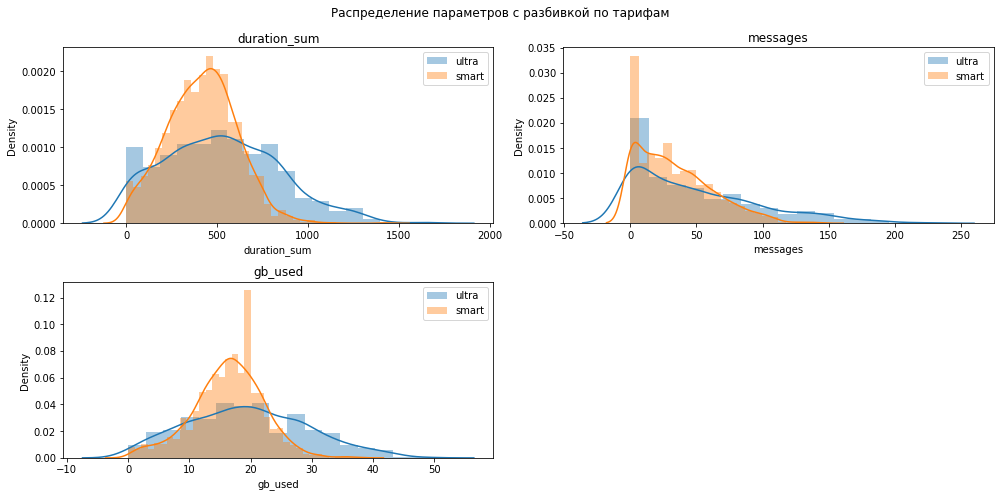

In [36]:
# для того чтобы предупреждение не мешало
warnings.filterwarnings('ignore')
params = ['duration_sum', 'messages', 'gb_used']

# число рядов и столбцов в сетке графиков
col_count, row_count = 2, 2

# размер графиков
plt.figure(figsize = (14, 7))

# положение графиков в сетке, i+1 порядковый номер графика
for i, param in enumerate(params):
    for tariff in df['tariff_name'].unique():
        current = df.query('tariff_name == @tariff')
        sns.distplot(current[param], label = tariff, 
                     ax = plt.subplot(row_count, col_count, i + 1)
                    )
        
        # добавление подзаголовков на каждый график
        plt.title(param)
        
        # добавление легенды на каждый график
        plt.legend()

# название        
plt.suptitle('Распределение параметров с разбивкой по тарифам')

# настройка подзаголовков
plt.tight_layout()

Описание распределения:

На графиках с минутами разговора(`duration_sum`) и объемом интернет-трафика (`gb_used`) распределение значений биномиально со стремлением к нормальному распределению. На графике с количеством сообщений(`messages`) значения распределены биномиально. 

**Вывод**

При описание поведения клиентов оператора, исходя из выборки можно сделать вывод о том, что в среднем для клиентов тарифа «Смарт»("smart") хватает минут и сообщений, включенных в тариф, а вот бсплатного интернет-трафика (15 Гб) - недостаточно.

## Шаг 4. Проверка гипотез

*Гипотеза №1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:*

H₀: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»;

H₁: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

Исходя из формулировки гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, были сформулированы нулевая(H₀) и альтернативная гипотезы(H₁), для нулевой сделано предположение о том, что средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт», а для альтернативной, наоборот, средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены. Для проверки гипотезы подойдет t-тест.

In [37]:
# критический уровень статистической значимости
# если p-value окажется меньше него - гипотеза отвергается
alpha = .001

results = st.ttest_ind(df.query('tariff_name == "ultra"')['revenue_per_month'], 
                      df.query('tariff_name == "smart"')['revenue_per_month']
                      )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


По результату t-теста средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт». То есть можно сказать, что гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются не подтверждается.

*Гипотеза№2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:*

H₀: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов (средние по двум выборкам не равны);

H₁: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов (средние по двум выборкам равны).

Исходя из формулировки гипотезы о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, были сформулированы нулевая(H₀) и альтернативная гипотезы(H₁), для нулевой сделано предположение о том, что средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов, а для альтернативной, наоборот, средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

In [38]:
# критический уровень статистической значимости
# если p-value окажется меньше него - гипотеза отвергается
alpha = .001

results = st.ttest_ind(df.query('city == "Москва"')['revenue_per_month'], 
                      df.query('city != "Москва"')['revenue_per_month']
                      )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


По результату t-теста средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов. То есть можно сказать, что гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не отвергается.

## Шаг 5. Общий вывод

В начале проекта, при просмотре данных в таблицах в названиях столбцов не было обнаружено нарушений стиля, тип данных соответсвовал их содержимому в столбцах. Для удобства исследования таблицы были объедины и уже исходя из объединенной таблицы было рассматрено наличие пропусков, дубликатов и ошибок в данных. При подготовке данных таблицы с данными по пользователям, сообщениям, звонкам, интернету и тарифам были объединены в одну таблицу, были рассчитаны количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика, помесячная выручка с каждого пользователя по месяцам.
Изменены типы данных в столбцах `duration`, `mb_used`(`gb_used`), `messages`, `reg_date`, `mb_per_month_included`(`gb_per_month_included`).

При описание поведения клиентов оператора, исходя из выборки, в среднем для клиентов тарифа «Смарт» хватает минут и сообщений, включенных в тариф, а вот бсплатного интернет-трафика (15 Гб) - недостаточно.

Исходя из этого, можно сказать, что пользователи более дорогого (по ежемесячной оплате) тарифа «Ультра», в среднем, используют меньше предоставленных им минут, сообщений и интернета, тогда как пользователи тарифа «Смарт», в среднем, используют интернет сверх предоставленного, который оплачивают сверх ежемесячной оплаты по тарифу. При проверке гипотиз, гипотиза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - не подтверждается. В связи с этим можно сказать, что оба тарифа приносят хорошую выручку оператору и при расчете бюджета на рекламу, стоит вложиться в рекламу обоих трифов. Но стоит задуматься о рекламе в регионах, так как гипотиза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не отвергается.
